In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [15]:
type(data)

dict

In [16]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978036e+07,1.978036e+07,False,NaN,1,NaN,NaN,None,2024-11-10T15:48:00.000Z,79763.722219,6.224663e+10,52.1026,0.553664,4.485599,17.793203,28.393234,40.169840,33.199561,1.577755e+12,57.5743,1.675038e+12,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
1,1027,Ethereum,ETH,ethereum,9510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204231e+08,1.204231e+08,True,NaN,2,NaN,NaN,None,2024-11-10T15:48:00.000Z,3210.362161,3.860333e+10,28.7680,1.089363,5.588692,32.161335,31.652779,37.617094,19.965432,3.866016e+11,14.1076,3.866016e+11,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
2,825,Tether USDt,USDT,tether,102739,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.232010e+11,1.248354e+11,True,NaN,3,NaN,NaN,None,2024-11-10T15:48:00.000Z,1.000544,1.357460e+11,51.3851,-0.031625,0.027528,0.097010,0.074447,0.035443,0.018680,1.232680e+11,4.4982,1.249033e+11,None,2024-11-10T15:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-10 10:49:58.817652
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.716486e+08,5.880787e+08,True,NaN,4,NaN,NaN,None,2024-11-10T15:48:00.000Z,212.944646,6.143803e+09,58.8317,3.782506,7.232647,34.261767,47.750774,61.000793,44.978522,1.004351e+11,3.6650,1.252282e+11,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440994e+08,1.440994e+08,False,NaN,5,NaN,NaN,None,2024-11-10T15:48:00.000Z,637.277571,2.626597e+09,-2.0480,0.387367,3.150559,16.265859,11.640386,22.675818,23.016024,9.183131e+10,3.3510,9.183131e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
5,3408,USDC,USDC,usd-coin,22931,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.702603e+10,3.702603e+10,False,NaN,6,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.999738,9.240930e+09,18.1964,-0.030602,-0.000159,-0.024035,-0.040246,-0.034882,-0.036994,3.701635e+10,1.3508,3.701635e+10,None,2024-11-10T15:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-10 10:49:58.817652
6,74,Dogecoin,DOGE,dogecoin,1095,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467346e+11,1.467346e+11,True,NaN,7,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.246835,8.115991e+09,95.8580,2.957848,20.088887,72.125137,125.344510,146.057297,131.017432,3.621929e+10,1.3217,3.621929e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
7,52,XRP,XRP,xrp,1415,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,8,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.603753,3.245734e+09,142.4202,0.730427,10.093371,22.204807,12.420858,13.079697,5.358741,3.433463e+10,1.2625,6.037530e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
8,2010,Cardano,ADA,cardano,1337,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,

In [28]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # global df

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\kaybr\Downloads\API Crypto\API.csv'):
        df.to_csv(r'C:\Users\kaybr\Downloads\API Crypto\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kaybr\Downloads\API Crypto\API.csv', mode='a', header=False)

In [30]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978036e+07,1.978036e+07,False,NaN,1,NaN,NaN,None,2024-11-10T15:48:00.000Z,79763.722219,6.224663e+10,52.1026,0.553664,4.485599,17.793203,28.393234,40.169840,33.199561,1.577755e+12,57.5743,1.675038e+12,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
1,1027,Ethereum,ETH,ethereum,9510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204231e+08,1.204231e+08,True,NaN,2,NaN,NaN,None,2024-11-10T15:48:00.000Z,3210.362161,3.860333e+10,28.7680,1.089363,5.588692,32.161335,31.652779,37.617094,19.965432,3.866016e+11,14.1076,3.866016e+11,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
2,825,Tether USDt,USDT,tether,102739,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.232010e+11,1.248354e+11,True,NaN,3,NaN,NaN,None,2024-11-10T15:48:00.000Z,1.000544,1.357460e+11,51.3851,-0.031625,0.027528,0.097010,0.074447,0.035443,0.018680,1.232680e+11,4.4982,1.249033e+11,None,2024-11-10T15:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-10 10:49:58.817652
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.716486e+08,5.880787e+08,True,NaN,4,NaN,NaN,None,2024-11-10T15:48:00.000Z,212.944646,6.143803e+09,58.8317,3.782506,7.232647,34.261767,47.750774,61.000793,44.978522,1.004351e+11,3.6650,1.252282e+11,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440994e+08,1.440994e+08,False,NaN,5,NaN,NaN,None,2024-11-10T15:48:00.000Z,637.277571,2.626597e+09,-2.0480,0.387367,3.150559,16.265859,11.640386,22.675818,23.016024,9.183131e+10,3.3510,9.183131e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
5,3408,USDC,USDC,usd-coin,22931,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.702603e+10,3.702603e+10,False,NaN,6,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.999738,9.240930e+09,18.1964,-0.030602,-0.000159,-0.024035,-0.040246,-0.034882,-0.036994,3.701635e+10,1.3508,3.701635e+10,None,2024-11-10T15:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-10 10:49:58.817652
6,74,Dogecoin,DOGE,dogecoin,1095,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467346e+11,1.467346e+11,True,NaN,7,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.246835,8.115991e+09,95.8580,2.957848,20.088887,72.125137,125.344510,146.057297,131.017432,3.621929e+10,1.3217,3.621929e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
7,52,XRP,XRP,xrp,1415,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,8,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.603753,3.245734e+09,142.4202,0.730427,10.093371,22.204807,12.420858,13.079697,5.358741,3.433463e+10,1.2625,6.037530e+10,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
8,2010,Cardano,ADA,cardano,1337,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11797,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19780362.00000,19780362.00000,False,NaN,1,NaN,NaN,None,2024-11-10T15:48:00.000Z,79763.72222,62246631140.64330,52.10260,0.55366,4.48560,17.79320,28.39323,40.16984,33.19956,1577755299964.81958,57.57430,1675038166604.89990,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
1,1027,Ethereum,ETH,ethereum,9510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120423059.36814,120423059.36814,True,NaN,2,NaN,NaN,None,2024-11-10T15:48:00.000Z,3210.36216,38603325198.90636,28.76800,1.08936,5.58869,32.16133,31.65278,37.61709,19.96543,386601633090.92999,14.10760,386601633090.92999,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
2,825,Tether USDt,USDT,tether,102739,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,123200981216.89262,124835400539.23732,True,NaN,3,NaN,NaN,None,2024-11-10T15:48:00.000Z,1.00054,135746028503.75838,51.38510,-0.03163,0.02753,0.09701,0.07445,0.03544,0.01868,123268030099.77899,4.49820,124903338911.71001,None,2024-11-10T15:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-10 10:49:58.817652
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471648643.74985,588078674.36959,True,NaN,4,NaN,NaN,None,2024-11-10T15:48:00.000Z,212.94465,6143802540.44825,58.83170,3.78251,7.23265,34.26177,47.75077,61.00079,44.97852,100435053563.18379,3.66500,125228205237.88000,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
4,1839,BNB,BNB,bnb,2274,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099392.79638,144099392.79638,False,NaN,5,NaN,NaN,None,2024-11-10T15:48:00.000Z,637.27757,2626596631.71442,-2.04800,0.38737,3.15056,16.26586,11.64039,22.67582,23.01602,91831311077.91927,3.35100,91831311077.92000,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
5,3408,USDC,USDC,usd-coin,22931,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37026033230.00137,37026033230.00137,False,NaN,6,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.99974,9240930238.36032,18.19640,-0.03060,-0.00016,-0.02404,-0.04025,-0.03488,-0.03699,37016346650.21645,1.35080,37016346650.22000,None,2024-11-10T15:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-10 10:49:58.817652
6,74,Dogecoin,DOGE,dogecoin,1095,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146734626383.70520,146734626383.70520,True,NaN,7,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.24684,8115990585.45022,95.85800,2.95785,20.08889,72.12514,125.34451,146.05730,131.01743,36219287341.41480,1.32170,36219287341.41000,None,2024-11-10T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-10 10:49:58.817652
7,52,XRP,XRP,xrp,1415,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,8,NaN,NaN,None,2024-11-10T15:48:00.000Z,0.60375,3245733751.17567,142.42020,0.73043,10.09337,22.20481,12.42086,13.07970,5.35874,34334626905.86741,1.26250,60375302042.51000,None,2024-11-10T15:48:00.000Z,N

In [40]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.51069,4.45207,17.43653,28.23037,40.31036,33.05429
Ethereum,0.89623,5.40750,31.68701,31.45182,37.74646,19.73403
Tether USDt,-0.02014,0.03439,0.08907,0.07782,0.05377,0.02469
Solana,3.56033,7.08666,33.71806,47.43968,61.19415,44.71320
BNB,0.63141,3.37501,16.19088,11.72174,23.04703,23.12069
USDC,-0.01225,0.01289,-0.01911,-0.02375,-0.01900,-0.02186
Dogecoin,2.86644,20.17083,71.28599,124.97642,146.25892,130.89480
XRP,0.79692,10.09232,22.11573,12.36784,13.16691,5.35286
Cardano,-0.31856,35.95207,79.93329,70.91825,76.26621,74.96311


In [42]:
df4 = df3.stack()
df4


name                                      
Bitcoin       quote.USD.percent_change_1h      0.51069
              quote.USD.percent_change_24h     4.45207
              quote.USD.percent_change_7d     17.43653
              quote.USD.percent_change_30d    28.23037
              quote.USD.percent_change_60d    40.31036
              quote.USD.percent_change_90d    33.05429
Ethereum      quote.USD.percent_change_1h      0.89623
              quote.USD.percent_change_24h     5.40750
              quote.USD.percent_change_7d     31.68701
              quote.USD.percent_change_30d    31.45182
              quote.USD.percent_change_60d    37.74646
              quote.USD.percent_change_90d    19.73403
Tether USDt   quote.USD.percent_change_1h     -0.02014
              quote.USD.percent_change_24h     0.03439
              quote.USD.percent_change_7d      0.08907
              quote.USD.percent_change_30d     0.07782
              quote.USD.percent_change_60d     0.05377
              quote.US

In [44]:
df5 = df4.to_frame(name='values')
df5


values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.51069
             quote.USD.percent_change_24h   4.45207
             quote.USD.percent_change_7d   17.43653
             quote.USD.percent_change_30d  28.23037
             quote.USD.percent_change_60d  40.31036
             quote.USD.percent_change_90d  33.05429
Ethereum     quote.USD.percent_change_1h    0.89623
             quote.USD.percent_change_24h   5.40750
             quote.USD.percent_change_7d   31.68701
             quote.USD.percent_change_30d  31.45182
             quote.USD.percent_change_60d  37.74646
             quote.USD.percent_change_90d  19.73403
Tether USDt  quote.USD.percent_change_1h   -0.02014
             quote.USD.percent_change_24h   0.03439
             quote.USD.percent_change_7d    0.08907
             quote.USD.percent_change_30d   0.07782
             quote.USD.percent_change_60d   0.05377
             quote.USD.percent_change_90d   0.02469
Solana       quote.USD.percent_change_1h    3.56033
             quote.USD.percent_change_24h   7.08666
             quote.USD.percent_change_7d   33.71806
             quote.USD.percent_change_30d  47.43968
             quote.USD.percent_change_60d  61.19415
             quote.USD.percent_change_90d  44.71320
BNB          quote.USD.percent_change_1h    0.63141
             quote.USD.percent_change_24h   3.37501
             quote.USD.percent_change_7d   16.19088
             quote.USD.percent_change_30d  11.72174
             quote.USD.percent_change_60d  23.04703
             quote.USD.percent_change_90d  23.12069
USDC         quote.USD.percent_change_1h   -0.01225
             quote.USD.percent_change_24h   0.01289
             quote.USD.percent_change_7d   -0.01911
             quote.USD.percent_change_30d  -0.02375
             quote.USD.percent_change_60d  -0.01900
             quote.USD.percent_change_90d  -0.02186
Dogecoin     quote.USD.percent_change_1h    2.86644
             quote.USD.percent_change_24h  20.17083
             quote.USD.percent_change_7d   71.28599
             quote.USD.percent_change_30d 124.97642
             quote.USD.percent_change_60d 146.25892
             quote.USD.percent_change_90d 130.89480
XRP          quote.USD.percent_change_1h    0.79692
             quote.USD.percent_change_24h  10.09232
             quote.USD.percent_change_7d   22.11573
             quote.USD.percent_change_30d  12.36784
             quote.USD.percent_change_60d  13.16691
             quote.USD.percent_change_90d   5.35286
Cardano      quote.USD.percent_change_1h   -0.31856
             quote.USD.percent_change_24h  35.95207
             quote.USD.percent_change_7d   79.93329
             quote.USD.percent_change_30d  70.91825
             quote.USD.percent_change_60d  76.26621
             quote.USD.percent_change_90d  74.96311
Shiba Inu    quote.USD.percent_change_1h    3.39443
             quote.USD.percent_change_24h  34.84805
             quote.USD.percent_change_7d   59.17306
             quote.USD.percent_change_30d  46.19427
             quote.USD.percent_change_60d  96.60960
             quote.USD.percent_change_90d  86.89690
TRON         quote.USD.percent_change_1h    0.01688
             quote.USD.percent_change_24h   3.32981
             quote.USD.percent_change_7d    1.42195
             quote.USD.percent_change_30d   3.03089
             quote.USD.percent_change_60d   8.61835
             quote.USD.percent_change_90d  30.83178
Toncoin      quote.USD.percent_change_1h    0.84967
             quote.USD.percent_change_24h   2.95632
             quote.USD.percent_change_7d   15.34929
             quote.USD.percent_change_30d   3.23505
             quote.USD.percent_change_60d   3.00464
             quote.USD.percent_change_90d -16.66636
Avalanche    quote.USD.percent_change_1h    0.88501
             quote.USD.percent_change_24h  12.17549
             quote.USD.percent_change_7d   41.10021
             quote.USD.percent_change_30d

In [46]:
df5.count()

values    90
dtype: int64

In [50]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.51069
1,Bitcoin,quote.USD.percent_change_24h,4.45207
2,Bitcoin,quote.USD.percent_change_7d,17.43653
3,Bitcoin,quote.USD.percent_change_30d,28.23037
4,Bitcoin,quote.USD.percent_change_60d,40.31036
5,Bitcoin,quote.USD.percent_change_90d,33.05429
6,Ethereum,quote.USD.percent_change_1h,0.89623
7,Ethereum,quote.USD.percent_change_24h,5.40750
8,Ethereum,quote.USD.percent_change_7d,31.68701
9,Ethereum,quote.USD.percent_change_30d,31.45182


In [60]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.51069
1,Bitcoin,quote.USD.percent_change_24h,4.45207
2,Bitcoin,quote.USD.percent_change_7d,17.43653
3,Bitcoin,quote.USD.percent_change_30d,28.23037
4,Bitcoin,quote.USD.percent_change_60d,40.31036
5,Bitcoin,quote.USD.percent_change_90d,33.05429
6,Ethereum,quote.USD.percent_change_1h,0.89623
7,Ethereum,quote.USD.percent_change_24h,5.40750
8,Ethereum,quote.USD.percent_change_7d,31.68701
9,Ethereum,quote.USD.percent_change_30d,31.45182


In [66]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.51069
1,Bitcoin,24h,4.45207
2,Bitcoin,7d,17.43653
3,Bitcoin,30d,28.23037
4,Bitcoin,60d,40.31036
5,Bitcoin,90d,33.05429
6,Ethereum,1h,0.89623
7,Ethereum,24h,5.40750
8,Ethereum,7d,31.68701
9,Ethereum,30d,31.45182


In [54]:
import seaborn as sns

C:\Users\kaybr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


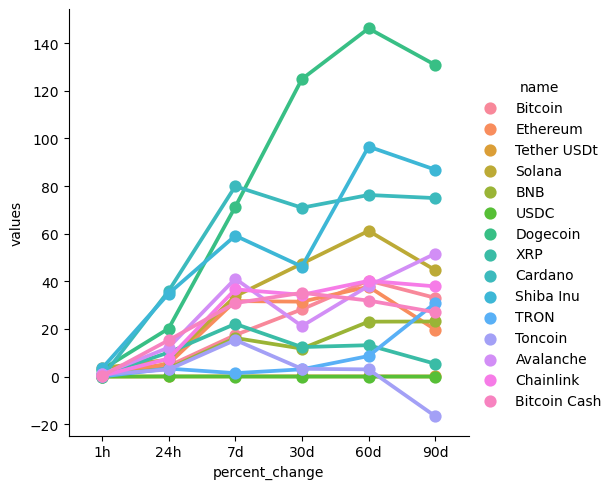

In [68]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')